In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform as tf

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
import healpy as hp

### Fetching tile

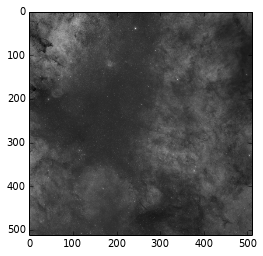

In [2]:
# hdu_list = fits.open('https://rawgithub.com/hipspy/hips-extra/master/datasets/samples/DSS2Red/Norder3/Dir0/Npix335.fits')
hdu_list = fits.open('https://rawgithub.com/hipspy/hips-extra/master/datasets/samples/DSS2Red/Norder3/Dir0/Npix450.fits')

tile_wcs = WCS(hdu_list[0].header)
tile = hdu_list[0].data.astype('float')
plt.imshow(tile, cmap='gray')
plt.show()

### Creating a WCS object

In [3]:
w = WCS(naxis=2)

skydir = SkyCoord(0, 0, unit='deg', frame='galactic')

w.wcs.ctype[0] = 'GLON-{}'.format('AIT')
w.wcs.ctype[1] = 'GLAT-{}'.format('AIT')
w.wcs.crval[0] = skydir.galactic.l.deg
w.wcs.crval[1] = skydir.galactic.b.deg

w.wcs.crpix[0] = 1000
w.wcs.crpix[1] = 500

w.wcs.cdelt[0] = -0.01
w.wcs.cdelt[1] = 0.01

w = WCS(w.to_header())

shape = (1000, 2000)
all_sky_wcs = w

### Function definition for computing HiPS tile corners

In [17]:
def compute_corners_skycoord(order, ipix):
    nside = hp.order2nside(order)
    coords = hp.boundaries(nside, ipix, nest=True)
    theta, phi = hp.vec2ang(np.transpose(coords), lonlat=False)
    radec = SkyCoord(ra=phi, dec=np.pi/2 - theta, unit='radian', frame='icrs')
    print('SkyCoord :', radec.galactic)
    pixels = np.array(radec.to_pixel(all_sky_wcs))
    return (pixels.T.reshape((4,2)))

def compute_corners_skycoord_galactic(order, ipix):
    nside = hp.order2nside(order)
    coords = hp.boundaries(nside, ipix, nest=True)
    theta, phi = hp.vec2ang(np.transpose(coords), lonlat=False)
    radec = SkyCoord(l=phi, b=np.pi/2 - theta, unit='radian', frame='galactic')
    pixels = np.array(radec.to_pixel(all_sky_wcs))
    return (pixels.T.reshape((4,2)))

### Function definition for drawing a  HiPS tile

In [8]:
from skimage import transform as tf
def draw_tile(warped, corners, out_shape):
    src = corners
    print('Source : ', src)
    dst = np.array([[511, 0], [511, 511], [0, 511], [0, 0]])
    tform3 = tf.ProjectiveTransform()
    tform3.estimate(src, dst)
    return warped + tf.warp(tile, tform3, output_shape=out_shape)

SkyCoord : <SkyCoord (Galactic): (l, b) in deg
    [(   2.70907683,  3.81383515), ( 355.44356947,  4.98219156),
     ( 353.36235549, -2.10918264), (   0.67390004, -3.23622577)]>
Corners:  [[  728.54880122   880.33972146]
 [ 1453.32078085   997.1604671 ]
 [ 1662.33429379   288.00518917]
 [  931.69072155   175.4190427 ]]
Source :  [[  728.54880122   880.33972146]
 [ 1453.32078085   997.1604671 ]
 [ 1662.33429379   288.00518917]
 [  931.69072155   175.4190427 ]]
SkyCoord : <SkyCoord (Galactic): (l, b) in deg
    [( 9.81679937,  1.9916332 ), ( 2.70907683,  3.81383515),
     ( 0.67390004, -3.23622577), ( 7.80150553, -5.05483801)]>
Corners:  [[  18.06518067  698.33607523]
 [ 728.54880122  880.33972146]
 [ 931.69072155  175.4190427 ]
 [ 221.27799678   -6.61222551]]
Source :  [[  18.06518067  698.33607523]
 [ 728.54880122  880.33972146]
 [ 931.69072155  175.4190427 ]
 [ 221.27799678   -6.61222551]]
[ 2458.52782355  2253.61557058  2313.24906255  2336.49996206]


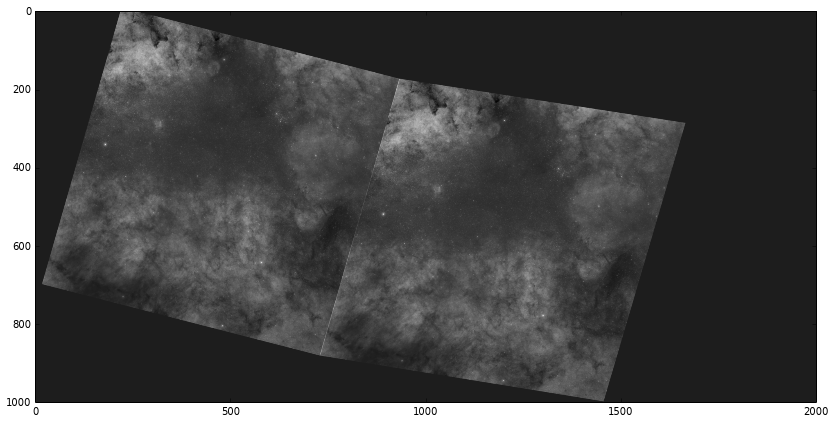

In [16]:
from astropy.visualization.wcsaxes import WCSAxes
warped = np.zeros((1000, 2000)) # the output image size

indices = [450, 451]#, 335, 336, 368, 399, 400, 432, 463]
for index in indices:
    corners = compute_corners_skycoord(3, index)
    print('Corners: ', corners)
    warped = draw_tile(warped, corners, warped.shape)
fig, ax = plt.subplots(nrows=1, figsize=(14, 14))

ax.imshow(warped, origin='upper', cmap=plt.cm.gray)
print(warped[400, 500:504])

Corners:  [[  999.          1457.2863541 ]
 [ 1559.97491994   977.02428079]
 [  999.           499.        ]
 [  438.02508006   977.02428079]]
Source :  [[  999.          1457.2863541 ]
 [ 1559.97491994   977.02428079]
 [  999.           499.        ]
 [  438.02508006   977.02428079]]
Corners:  [[  450.04369516  1943.33081831]
 [  999.          1457.2863541 ]
 [  438.02508006   977.02428079]
 [ -113.70771866  1458.43389037]]
Source :  [[  450.04369516  1943.33081831]
 [  999.          1457.2863541 ]
 [  438.02508006   977.02428079]
 [ -113.70771866  1458.43389037]]
[ 0.  0.  0.  0.]


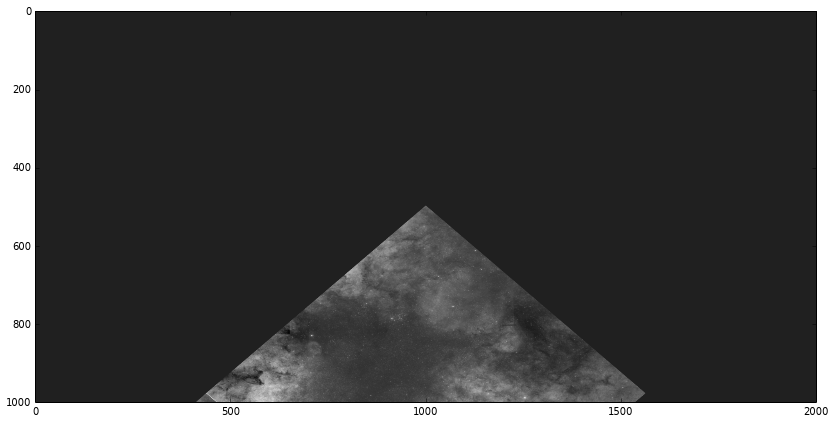

In [31]:
from astropy.visualization.wcsaxes import WCSAxes
warped = np.zeros((1000, 2000)) # the output image size

indices = [304, 305]#, 335, 336, 368, 399, 400, 432, 463]
for index in indices:
    corners = compute_corners_skycoord_galactic(3, index)
    print('Corners: ', corners)
    warped = draw_tile(warped, corners, warped.shape)
fig, ax = plt.subplots(nrows=1, figsize=(14, 14))

ax.imshow(warped, origin='upper', cmap=plt.cm.gray)
print(warped[400, 500:504])